# Capstone Project — Unsupervised Machine Learning

This dataset is from the US Arrests Kaggle challenge **(link)**. A description of the
data is given as: “This data set contains statistics, in arrests per 100,000 residents,
for assault, murder, and rape in each of the 50 US states in 1973. Also given is the
percent of the population living in urban areas.”

Follow these steps:

- Use the dataset **UsArrests.csv** included in this folder to generate a similar in-depth PCA report of the data. Explore as much as you can, motivate the pre-processing steps you take, and interpret the outcomes of any analyses.
- You are also required to do an application of two clustering techniques and an analysis of the clusters they generate. Try and see if you can find anything common within each cluster that has been found.


------------------------------------------------
### Import libraries

In [101]:
# Import necessary libraries
import pandas as pd  # data processing
import numpy as np  # linear algebra
import os # accessing directory structure
os.environ["OMP_NUM_THREADS"] = '1' # To avoid KMeans memory leak on Windows with MKL userwarning

# To avoid future warnings
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import scaling and processing libraries
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

# Import library to model the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Import our necessary clustering libraries
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

**Imported Libraries:**
1. We imported: `pandas`, `numpy`, and `os `
    - This will be for data processing, linear algebra, and accessing the directory structure.    
2. We imported: `matplotlib` and `seaborn `
    - For our plotting and data visualisations.


**PCA and Scaling processing libraries**
1. We imported from sklearn.decomposition: `PCA` 
    - This is to do our in-depth PCA report
2. We imported from sklearn.preprocessing: `StandardScaler`
    - This is to scale the data

**Modelling the data**
1. We imported from sklearn.model_selection: `train_test_split`
    - This will be used for model prediction
    
**Finding the optimal number of clusters**    
1. We imported from sklearn.metrics: `silhouette_score`
    - This will be used to achieve the ideal number of cluster for our models
    
**For our 2 clustering techniques:**
1. KMeans Clustering:
    - We imported from sklearn.cluster: `KMeans`
2. Hierarchial Clustering:
    - We imported from sklearn.cluster: `AgglomerativeClustering`
    - We imported from scipy.cluster.hierarchy: `dendrogram` and `linkage`


------------------------------------------------
### Load data set

In [102]:
# Load data
df = pd.read_csv('UsArrests.csv')

# Observe data
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600


------------------------------------------------
### Preprocessing

In [103]:
# Checking null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [104]:
# Checking statistical data
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,7.788,170.760,65.540,21.232
std,4.356,83.338,14.475,9.366
min,0.800,45.000,32.000,7.300
25%,4.075,109.000,54.500,15.075
50%,7.250,159.000,66.000,20.100
75%,11.250,249.000,77.750,26.175
max,17.400,337.000,91.000,46.000


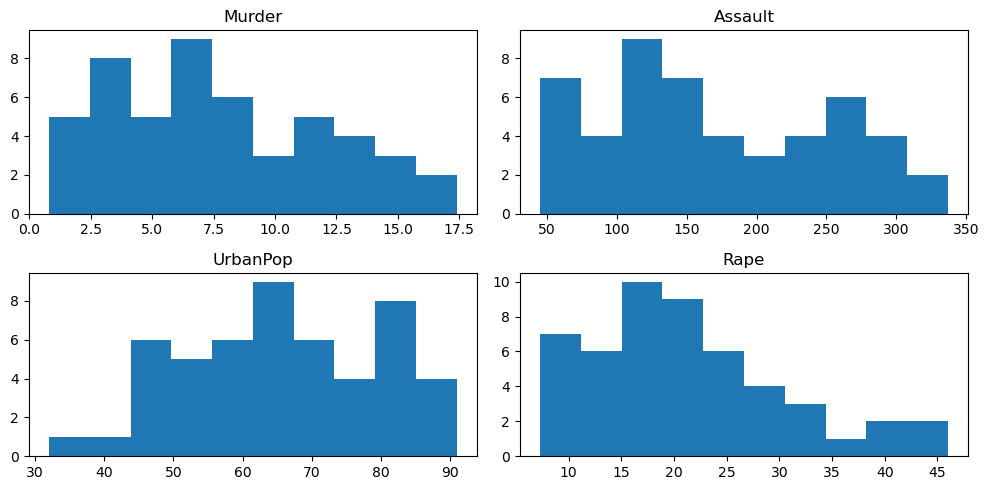

In [105]:
# To visualise the distribution of the observations for each feature, we plot a histogram
# Plot histograms
df.hist(grid=False, figsize=(10, 5))
plt.tight_layout()
plt.show()

**Observations:**

1. We can see that the UsArrests.csv file contains 50 rows with 5 columns.
2. There are no null values.
3. The four variables have vastly different means
4. The variables also have vastly different variances
5. UrbanPop variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of murders, rapes or assaults in each state per 100,000 individuals.
6. We can see that only the column named 'City' is of an object data type, as these are the names of the states.
7. No columns need to be dropped as we will be using all of them in our analysis. 
8. Based on the statistical data we will need to scale the data for better analysis.

--------------------------------------------------
### Correlation Analysis

<Axes: >

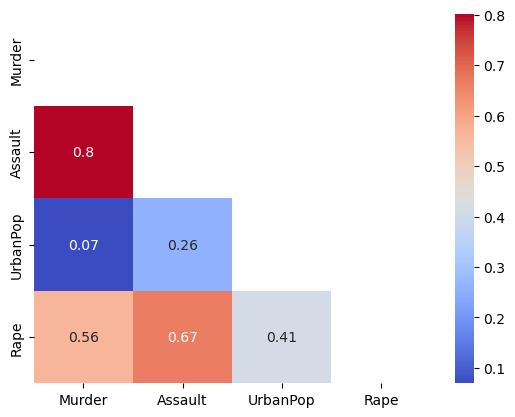

In [106]:
corr_df = df.drop(["City"],axis=1).corr()
labels = corr_df.columns

mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, annot=True, cmap="coolwarm")

In [107]:
# Viewing the statistics from the correlation graph
corr1 = corr_df

corr1

,Murder,Assault,UrbanPop,Rape
Murder,1.000,0.802,0.070,0.564
Assault,0.802,1.000,0.259,0.665
UrbanPop,0.070,0.259,1.000,0.411
Rape,0.564,0.665,0.411,1.000


**Observations:**

* The correlation analysis shows that there is a strong positive correlation between murder and assault (0.80), as well as between assault and rape (0.67). This means that as the number of murders increases, so does the number of assaults, and vice versa.  

* There is also a moderate positive correlation between murder and rape (0.56), as well as between assault and urban population (0.26). This means that as the number of murders increases, so does the number of rapes, and vice versa. Similarly, as the percentage of the population living in urban areas increases, so does the number of assaults. 

* There is a weak positive correlation between murder and urban population (0.07), as well as between rape and urban population (0.41). This means that as the percentage of the population living in urban areas increases, so does the number of murders and rapes. 

* Overall, the correlation analysis shows that there is a strong relationship between violent crime and urbanicity. This is likely due to a number of factors, including poverty, inequality, and lack of opportunity.

-----------------------------------------
### Principal Component Analysis

In [108]:
np.set_printoptions(precision=2)

X = df.drop(["City"],axis=1).values.squeeze()

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.802,11.448,-2.495,2.408
1,92.827,17.983,20.127,-4.094
2,124.068,-8.830,-1.687,-4.354
3,18.340,16.704,0.210,-0.521
4,107.423,-22.520,6.746,-2.812


In [109]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Standard deviation: [83.73 14.21  6.49  2.48]
Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]
Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [110]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(15, 15))    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = df['City'][i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

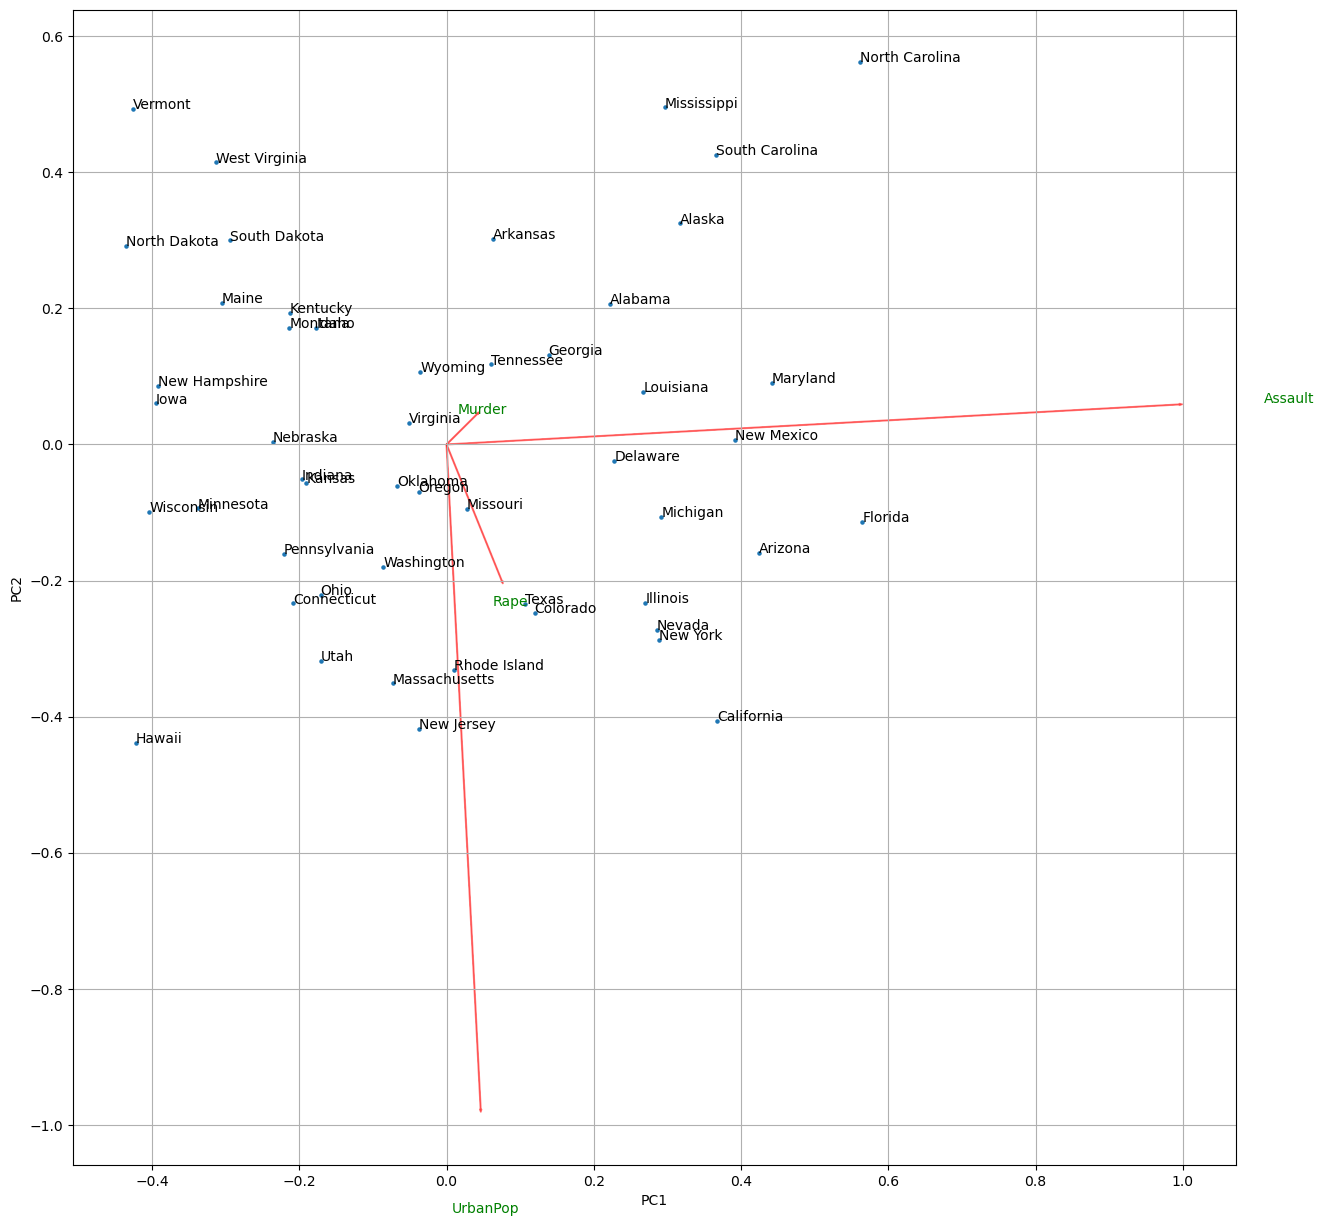

In [111]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(df['City']))
plt.show()

Each point on a biplot is the projected observation, transformed from the original data. The importance of each feature is indicated by the length of the arrows on the biplot. This corresponds to the magnitude of the values in the eigenvectors. From this biplot, we see that Assault and UrbanPop are the most important features as the arrows to each of these dominate the biplot.

This information can also be quantified as follows:

In [112]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


**Observations:**

- The output of the code is a table showing the importance of each feature in the first two principal components. The first principal component (PC1) explains 70.11% of the variance in the data, while the second principal component (PC2) explains 21.31% of the variance. 

- The most important feature in PC1 is Assault, which has a loading of 0.995. This means that Assault is strongly positively correlated with PC1. The second most important feature in PC1 is UrbanPop, which has a loading of 0.046. This means that UrbanPop is weakly positively correlated with PC1. 

- The most important feature in PC2 is UrbanPop, which has a loading of 0.977. This means that UrbanPop is strongly positively correlated with PC2. The second most important feature in PC2 is Rape, which has a loading of 0.201. This means that Rape is weakly positively correlated with PC2. 

- The biplot shows the relationship between the features and the principal components. The features are represented by points, and the principal components are represented by arrows. The length of the arrow indicates the importance of the principal component, and the direction of the arrow indicates the direction of the correlation between the principal component and the features. 

- The biplot shows that Assault and UrbanPop are strongly positively correlated with PC1, while Rape is weakly positively correlated with PC1. UrbanPop is strongly positively correlated with PC2, while Rape is weakly positively correlated with PC2. 

- The feature importance table and the biplot can be used to identify the most important features in the data. These features can then be used to build a model to predict the outcome of interest.

------------------------------------------------------------
### Scaling the data


In [113]:
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


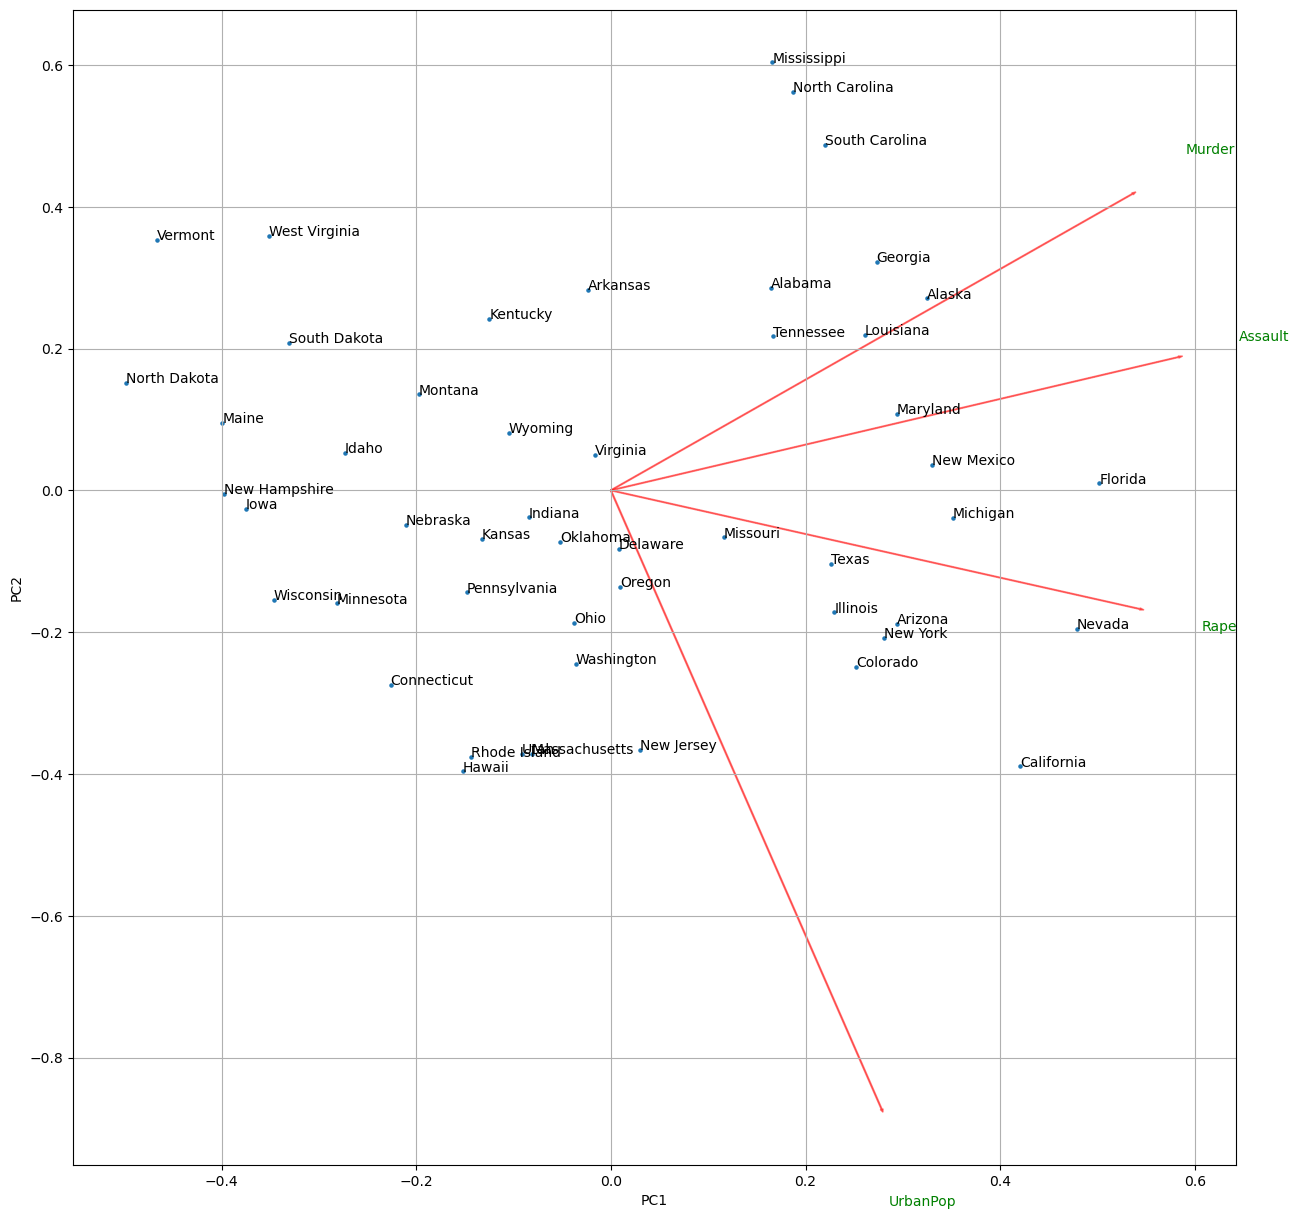

In [114]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

In the standardised data results above, far more variables are being utilised to explain the variance, as the large numbers no longer dominate it.

In [115]:
# Feature importance

pc1 = abs(std_pca.components_[0]) #components x features - access at index 0 to get the first component
pc2 = abs(std_pca.components_[1])

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


Inspecting the feature importance now, it seems that most of the variables contribute fairly evenly, with only some with low importance.

Text(0.5, 1.0, 'Cumulative Explained Variance')

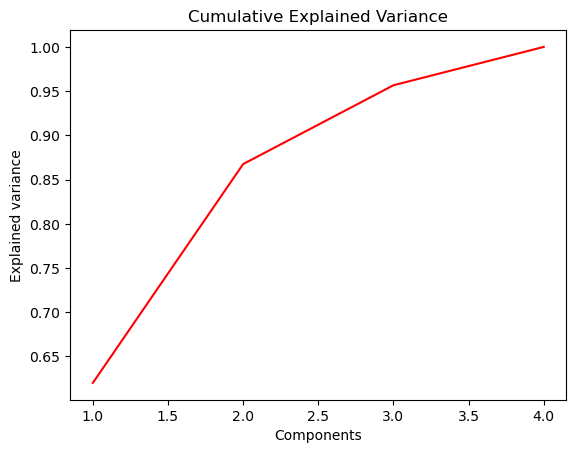

In [116]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_)+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

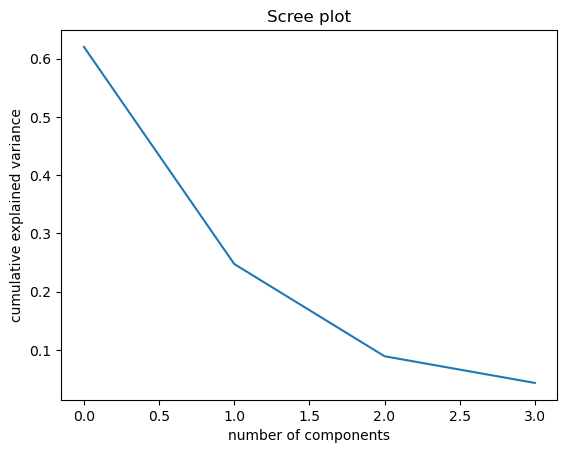

In [117]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

From the plots above, it seems the first 3 principal components together explain around 95% of the variance. We can therefore use them to perform cluster analysis.

In [118]:
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
0,0.986,1.133,-0.444
1,1.950,1.073,2.040
2,1.763,-0.746,0.055
3,-0.141,1.120,0.115
4,2.524,-1.543,0.599


**Observations:**

- This PCA analysis was conducted on a dataset containing information about murder, assault, urban population, and rape. 

- The first step in the analysis was to standardise the data, which helps to ensure that the features are on the same scale and that they are all equally important in the analysis. 

- The standardised data was then used to fit a PCA model, which identified two principal components that explain a significant amount of the variance in the data. 

- The first principal component is most strongly correlated with the features "assault" and "urban population", while the second principal component is most strongly correlated with the features "murder" and "rape". 

- The biplot shows the relationship between the features and the principal components, and it can be seen that the features are clustered together based on their correlations with the principal components. 

- The scree plot shows the amount of variance explained by each principal component, and it can be seen that the first two principal components explain a significant amount of the variance in the data. 

- The cumulative variance plot shows the cumulative amount of variance explained by the principal components, and it can be seen that the first two principal components explain a majority of the variance in the data. 

- Overall, this PCA analysis provides insights into the relationships between the features in the dataset and can be used to identify the most important features for further analysis.

-------------------------------------
### Selecting K

We need to determine which number of clusters will be the best suited for the optimal processing when doing our 2 clustering techniques, (i.e. K-Means Clustering and Hierarchial Clustering)

The following 2 methods to determine this will be used: 

1. Elbow Curve method
2. Silhouette Score

----------------------------------------------
##### 1. Elbow Curve method

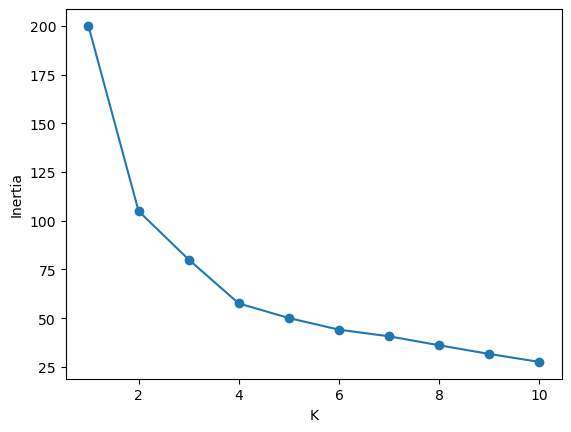

In [119]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# Plot elbow curve using scaled dataset
elbow_Kmeans(df_std_pca, max_k=10)  # df_std_pca: is the scaled data frame

**Observations:**

- Based on the above graph, it does not determine which is the best suited number of clusters between 2 to 4.


----------------------------------------------
##### 2. Silhouette Score

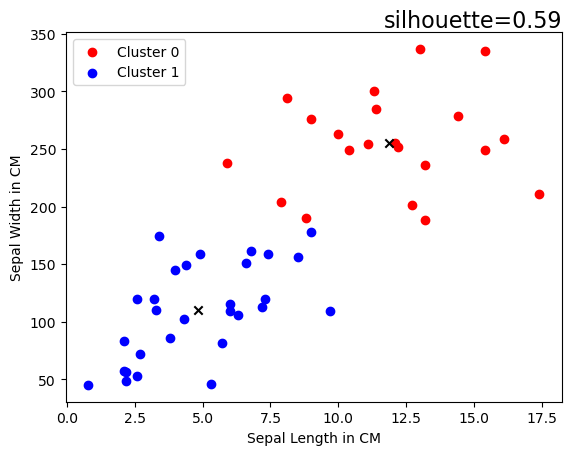

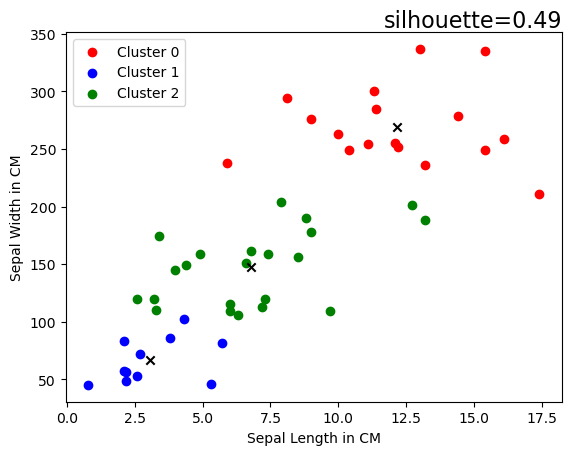

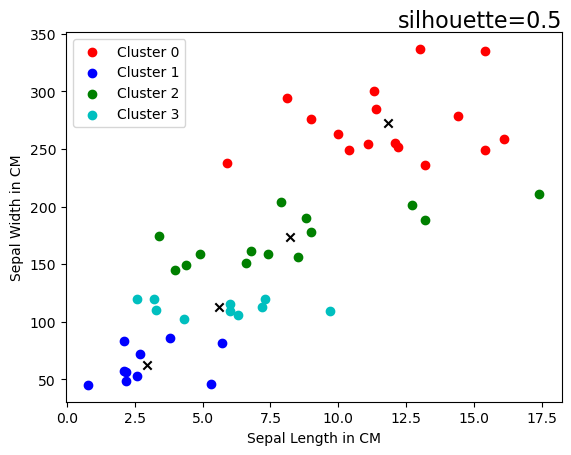

In [120]:
def scatter_Kmeans(x, k, r=42):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Sepal Length in CM')
    plt.ylabel('Sepal Width in CM')
    plt.legend()
    plt.show()

for k in range(2,5):
  scatter_Kmeans(X, k, r=0)

**Observations:**

* Based on the outputs of the code, we can conclude that the optimal number of clusters for this dataset is 2. 

* This is because the silhouette score, which measures the quality of the clusters, is the highest when k=2.

In [121]:
# Fitting number of clusters
k = 2

# Fitting random seed
r = 42

-------------------------------------
### K-Means Clustering

In [122]:
# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

In [123]:
# Fit k-means
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

Text(0, 0.5, 'Dim 1')

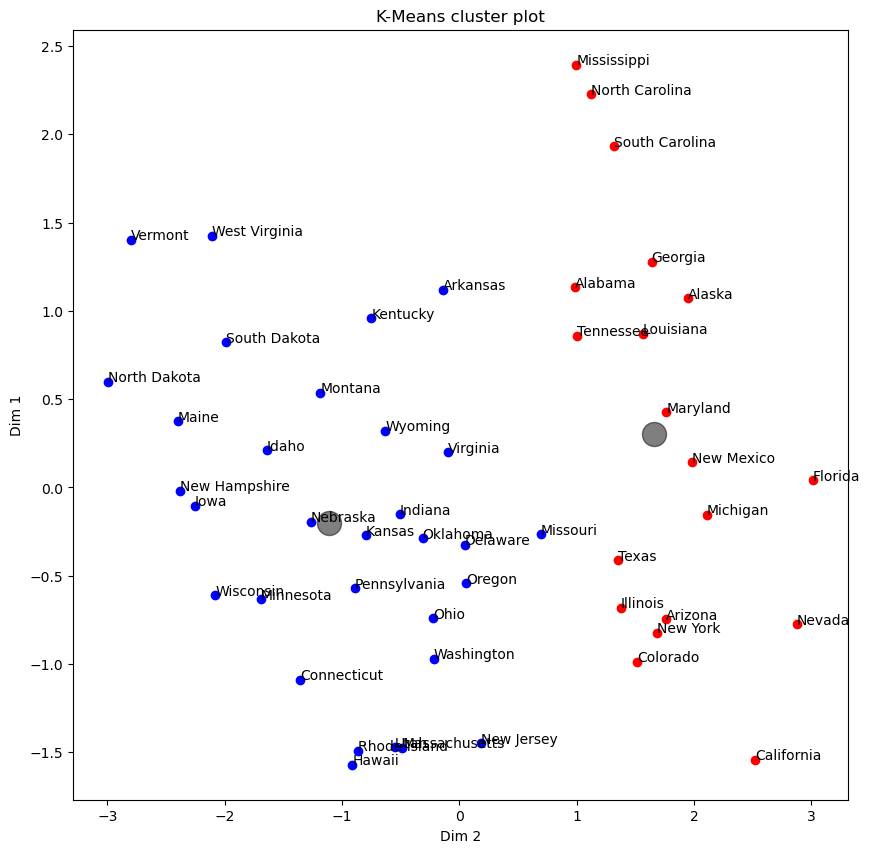

In [136]:
# Plot clusters
fig, ax = plt.subplots(figsize=(10,10))
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i])
    ax.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='o', c = "black", s=300, alpha=0.5)

for i in range(0,len(x)):
        txt = df['City'][i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

<Axes: xlabel='cluster labels', ylabel='Assault'>

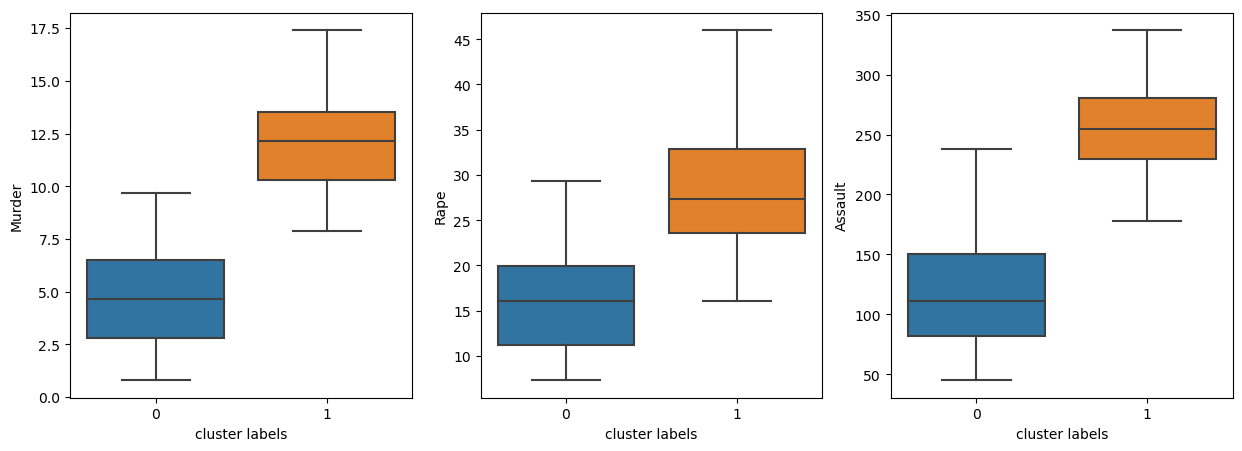

In [125]:
# Boxplots to display distribution of crime rates for the states in cluster 0 and cluster 1.
df['cluster labels']=cluster_labels
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
sns.boxplot(x='cluster labels', y='Murder', data=df, ax=ax[0])
sns.boxplot(x='cluster labels', y='Rape', data=df, ax=ax[1])
sns.boxplot(x='cluster labels', y='Assault', data=df, ax=ax[2])

From the box plots above, it seems:

* The states in Group-0 seems to be Low-risk States where there are relativley less Murders,Assaults and Rapes.
* The states in the Group-1 seems to have higher crime rates and can be regarded as High-risk States.

In [126]:
for i in range(k):
    group_indices = np.argwhere(cluster_labels==i).transpose()[0]
    group = np.array(df['City'])[group_indices]
    print(f'Group {i} States:', *group, sep=", ")
    print("\n")  

Group 0 States:, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming


Group 1 States:, Alabama, Alaska, Arizona, California, Colorado, Florida, Georgia, Illinois, Louisiana, Maryland, Michigan, Mississippi, Missouri, Nevada, New Mexico, New York, North Carolina, South Carolina, Tennessee, Texas




**Observations:**

* The K-Means clustering algorithm has grouped the states into two distinct clusters. The first cluster, which we can refer to as Group-0, consists of states with low crime rates. These states are predominantly located in the Northeastern and Western regions of the United States.

* On the other hand, the second cluster, which we can refer to as Group-1, consists of states with higher crime rates. These states are predominantly located in the Southern and Western regions of the United States.

* In conclusion, the K-Means clustering algorithm has successfully identified two distinct groups of states based on their crime rates. Group-0 represents states with low crime rates, while Group-1 represents states with high crime rates. This analysis can be useful for law enforcement agencies and policymakers to allocate resources and implement targeted crime prevention strategies.

-------------------------------------
### Hierarchial Clustering

#### Agglomerative Clustering

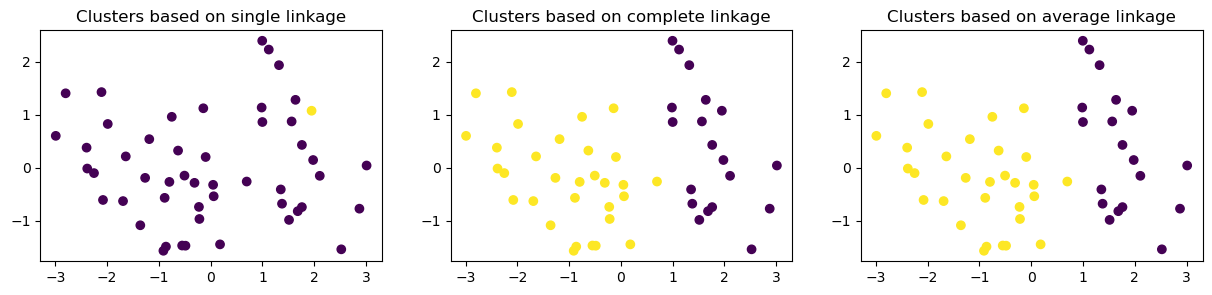

In [127]:
# Fitting the best linkage for the best number of clusters obtained
X = pca_df.values.reshape(-1, 3)
linkage_types = ['single', 'complete', 'average']

plt.figure(figsize=[15,3])
for i, l in enumerate(linkage_types):
    plt.subplot(1, 3, i+1)
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=l)
    cluster.fit_predict(X)

    ax = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)
    plt.title('Clusters based on {} linkage'.format(l))

L = 'complete'


#### Visualisation (Dendrograms)

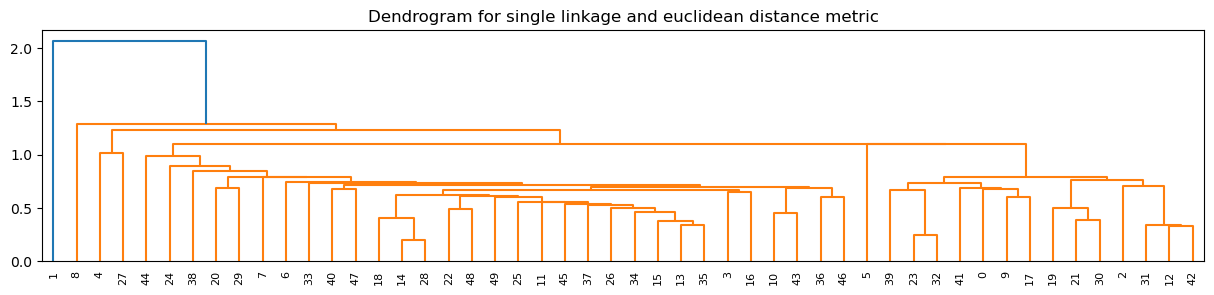

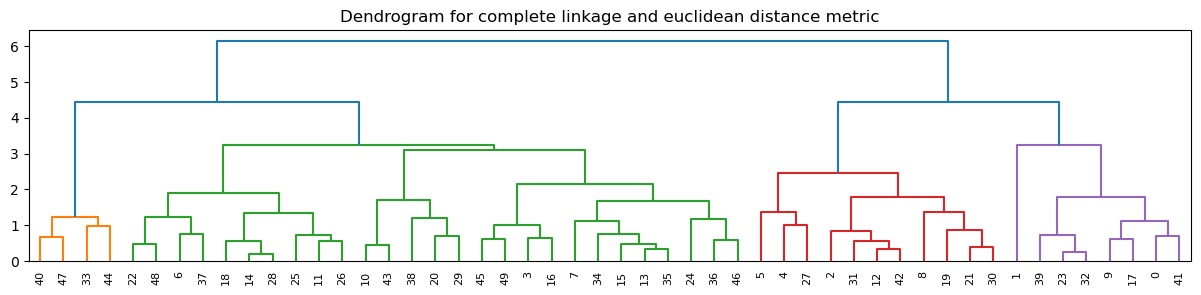

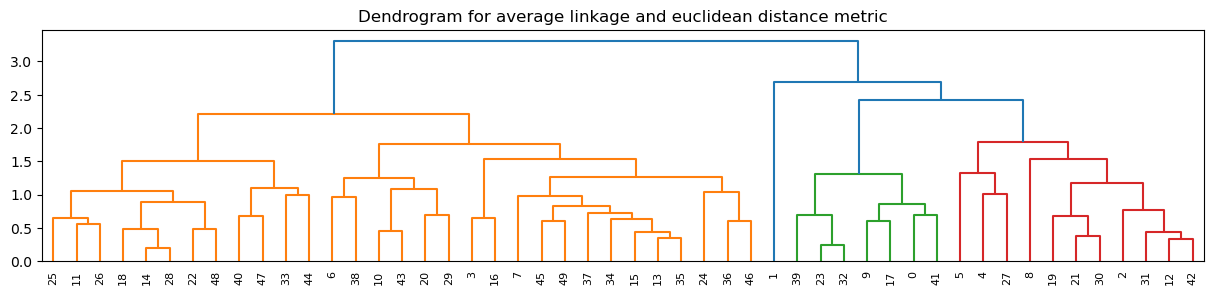

In [128]:
# Create dendrograms for different linkages, with the euclidean distance metrics
linkages = ['single', 'complete', 'average']
for link in linkages:
    plt.figure(figsize=[15,3])
    dendrogram(linkage(X, method=link, metric='euclidean'))
    plt.title('Dendrogram for {} linkage and euclidean distance metric'.format(link))
    plt.subplots_adjust(wspace=0.5)
    plt.show()

Text(0, 0.5, 'Dim 1')

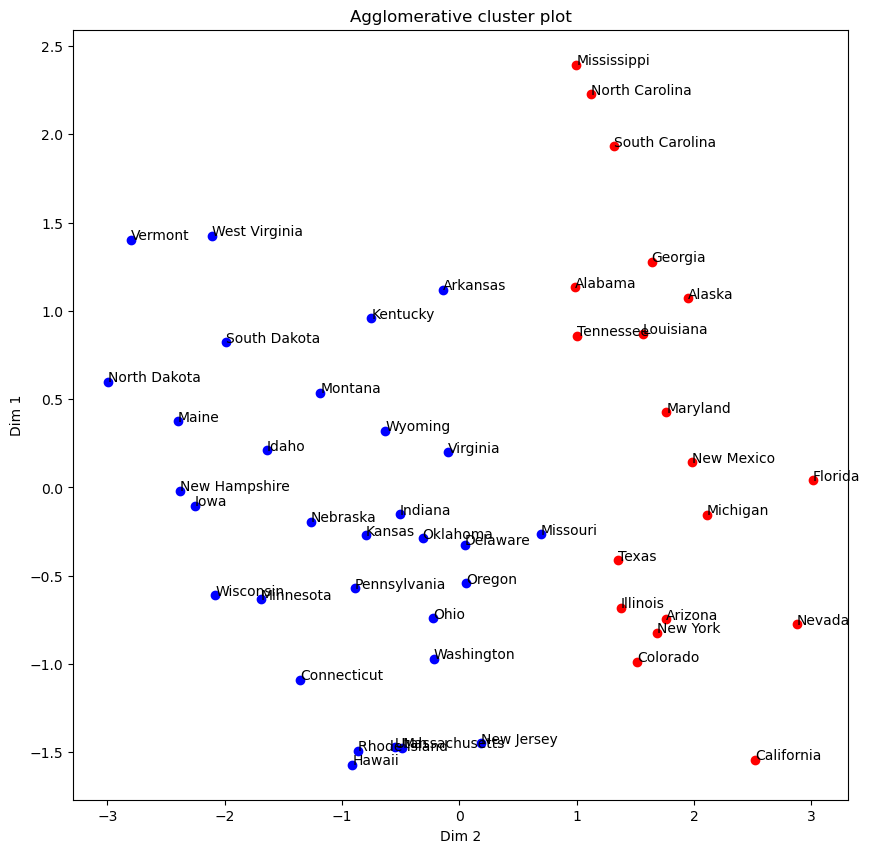

In [135]:
# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Run agglomerative hierarchical clustering with 2 number of clusters, 
#'complete' linkage method and 'euclidean' distance metric used for that dendrogram).
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
cluster_labels = cluster.fit_predict(pca_df)

# Plot clusters
fig, ax = plt.subplots(figsize=(10,10))
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = df['City'][i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("Agglomerative cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

<Axes: xlabel='cluster labels', ylabel='Assault'>

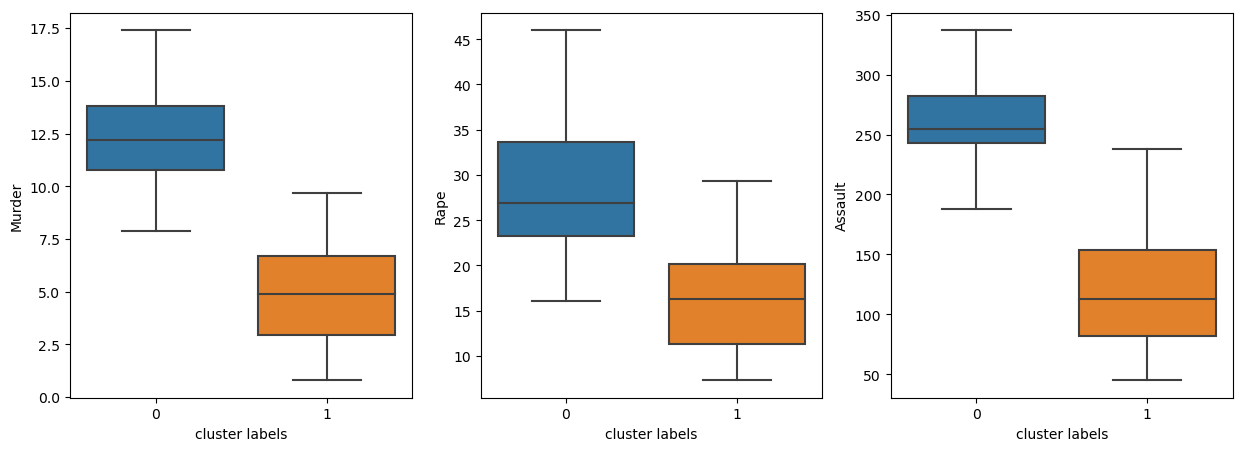

In [130]:
# Boxplots to display distribution of crime rates for the states in cluster 0 and cluster 1.
df['cluster labels']=cluster_labels
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(15,5))
sns.boxplot(x='cluster labels', y='Murder', data=df, ax=ax[0])
sns.boxplot(x='cluster labels', y='Rape', data=df, ax=ax[1])
sns.boxplot(x='cluster labels', y='Assault', data=df, ax=ax[2])

From the box plots above, it seems:

* The states in the Group-0 seems to have higher crime rates and can be regarded as High-risk States.
* The states in Group-1 seems to be Low-risk States where there are relativley less Murders,Assaults and Rapes.

In [131]:
for i in range(k):
    group_indices = np.argwhere(cluster_labels==i).transpose()[0]
    group = np.array(df['City'])[group_indices]
    print(f'Group {i} States:', *group, sep=", ")
    print("\n")

Group 0 States:, Alabama, Alaska, Arizona, California, Colorado, Florida, Georgia, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina, Tennessee, Texas


Group 1 States:, Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming




**Observations:**

* Based on the outputs of the code, we can conclude that the optimal number of clusters for this dataset is 2. This is because the silhouette score, which measures the quality of the clusters, is the highest when k=2.

* The hierarchical clustering analysis also supports this conclusion. The box plots of crime rates for the states in each cluster show that the states in Group-0 (k=0) have higher crime rates, while the states in Group-1 (k=1) have lower crime rates. 

* This suggests that the states in Group-0 can be regarded as High-risk States, while the states in Group-1 can be considered Low-risk States.

* In terms of the dendrograms, the 'complete' linkage method produces the most distinct clusters. This is because the 'complete' linkage method always joins the two clusters that are the most dissimilar, resulting in a tree where the most dissimilar clusters are far apart from each other.

* In summary, the optimal number of clusters for this dataset is 2, as determined by the silhouette score and the hierarchical clustering analysis. The states in Group-0 can be considered High-risk States, while the states in Group-1 can be regarded as Low-risk States.

------------------------------------------
### Final Observations:



* In the k-means clustering, the number of clusters is predetermined, and the algorithm assigns each data point to the closest cluster. In the hierarchical clustering, the number of clusters is not predetermined, and the algorithm builds a hierarchy of clusters, starting with each data point in its own cluster and then merging clusters together until a single cluster is formed.

* In this case, the k-means clustering results in 2 clusters, while the hierarchical clustering results in 3 clusters. The k-means clustering seems to have a better separation between the clusters, with the two clusters being more distinct from each other. The hierarchical clustering, on the other hand, has a more gradual transition between the clusters, with some data points being closer to the boundary between two clusters.

* The k-means clustering also seems to have a better representation of the data, with the clusters being more evenly distributed across the data space. The hierarchical clustering, on the other hand, has a more uneven distribution of the clusters, with one cluster being much larger than the other two.

* Overall, the k-means clustering seems to be a better fit for this data, as it results in a more distinct separation between the clusters and a more even distribution of the data points. The hierarchical clustering, on the other hand, may be more useful if the data is more complex and the number of clusters is not known in advance. 

--------------------------------------------------
### My Citings:

https://www.kaggle.com/code/hmahida/usarrests-pca-k-means-and-agglomerative-clustering

https://www.kaggle.com/code/gauravduttakiit/clustering-using-k-means-hierarchical-pca

https://www.kaggle.com/code/ankandash/pca-k-means-clustering-hierarchical-clustering

https://www.kaggle.com/code/halimedogan/usa-arrests-with-k-means-clustering

https://www.kaggle.com/code/kerneler/starter-usarrets-73d905cc-b/notebook

https://stackoverflow.com/questions/28862334/k-means-with-selected-initial-centers



--------------------------------------------------
#### Thank you, Farinaaz Slamang :)